<a href="https://colab.research.google.com/github/NEEEEEEEEEEEL/Debnil/blob/main/tensorflow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


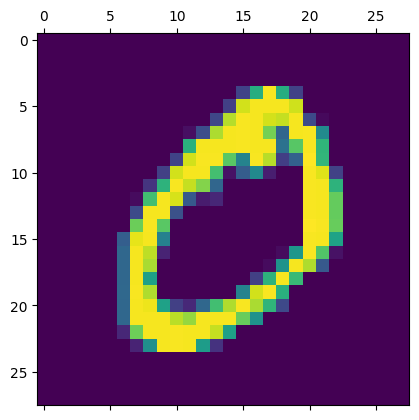

In [5]:
plt.matshow(x_train[1])

##sometime you need to scale your dataset

In [16]:
x_train=x_train/255
x_test=x_test/255

In [17]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

##create a neural network

In [18]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
##we have to compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4702 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3044 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9256


In [19]:
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [22]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2675 - accuracy: 0.9256


[0.2674926519393921, 0.925599992275238]

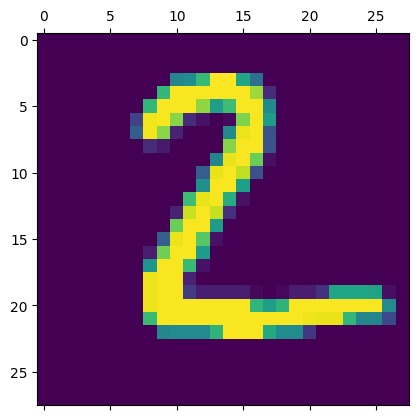

In [29]:
plt.matshow(x_test[1])

In [30]:
y_predicted=model.predict(x_test_flattened)
y_predicted[1]

313/313 [==============================] - 1s 2ms/step


array([4.1456318e-01, 3.2460284e-03, 9.9930608e-01, 3.4559366e-01,
       4.6777571e-10, 8.2238615e-01, 8.7329656e-01, 8.6433053e-13,
       1.5194444e-01, 3.8905270e-09], dtype=float32)

##now we have to find the max among these

In [32]:
np.argmax(y_predicted[1##])

2

##now we will add a hidden layer

In [38]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(200,activation="relu"),   ##hidden layer1
    keras.layers.Dense(10,activation="sigmoid")  ##hidden layer2
])
##we have to compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2320 - accuracy: 0.9329
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1000 - accuracy: 0.9695
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0705 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0539 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0440 - accuracy: 0.9860


In [39]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0803 - accuracy: 0.9764


[0.08032794296741486, 0.9764000177383423]

##umm you dont need to flatten your data every time,keras has inbuilt function for it

In [43]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(200,activation="relu"),   ##hidden layer1
    keras.layers.Dense(10,activation="sigmoid")  ##hidden layer2
])
##we have to compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2376 - accuracy: 0.9297
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1003 - accuracy: 0.9691
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0704 - accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0556 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0419 - accuracy: 0.9867
